In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
from PIL import Image
from sklearn.model_selection import train_test_split
import warnings
import random
from collections import Counter
warnings.filterwarnings("ignore")

In [9]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
dataset_name = "mnist"

# fashion_mnist = tf.keras.datasets.fashion_mnist
# (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# dataset_name = "fashion_mnist"

In [10]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


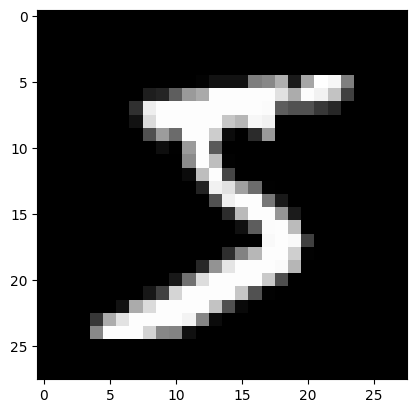

In [11]:
plt.imshow(train_images[0], cmap='gray')

In [12]:
# Convert images to one-dimensional arrays
num_train_samples = train_images.shape[0]
num_test_samples = test_images.shape[0]
num_features = train_images.shape[1] * train_images.shape[2]

train_images_reshaped = train_images.reshape((num_train_samples, num_features))
test_images_reshaped = test_images.reshape((num_test_samples, num_features))

# Create DataFrames for training and testing data
df_train = pd.DataFrame(train_images_reshaped)
df_test = pd.DataFrame(test_images_reshaped)

# Add a column for labels at the end
df_train['label'] = train_labels
df_test['label'] = test_labels

In [13]:
print(df_train.shape)
print(df_test.shape)

(60000, 785)
(10000, 785)


In [14]:
df_train['label'].value_counts()

label
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

In [15]:
sum(df_train['label'].value_counts())

60000

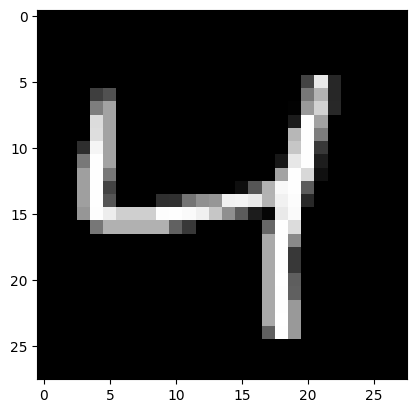

In [16]:
item = df_train.drop('label', axis=1).iloc[2].values.reshape(28,28)
plt.imshow(item, cmap='gray')

In [17]:
# Generate dataset with only samples from a single label
df_train_all = pd.DataFrame()
df_test_all = pd.DataFrame()

for i in range(0,10):
    df_train_aux = df_train[df_train["label"]==i]   
    df_test_aux = df_test[df_test["label"]==i] 
    print(f"{i}: {df_train_aux.shape}, {df_test_aux.shape}") 
    
    df_train_all = pd.concat([df_train_all, df_train_aux])
    df_test_all = pd.concat([df_test_all, df_test_aux]) 
    
    df_train_aux.reset_index(drop=True, inplace=True)
    df_test_aux.reset_index(drop=True, inplace=True)
      
    df_train_aux.to_pickle(f"./{dataset_name}/one-label/{i+1}_train.pickle")
    df_test_aux.to_pickle(f"./{dataset_name}/one-label/{i+1}_test.pickle")

df_train_all.reset_index(drop=True, inplace=True)
df_test_all.reset_index(drop=True, inplace=True)
df_train_all.to_pickle(f"./{dataset_name}/{dataset_name}/train.pickle")
df_test_all.to_pickle(f"./{dataset_name}/{dataset_name}/test.pickle")

0: (5923, 785), (980, 785)
1: (6742, 785), (1135, 785)
2: (5958, 785), (1032, 785)
3: (6131, 785), (1010, 785)
4: (5842, 785), (982, 785)
5: (5421, 785), (892, 785)
6: (5918, 785), (958, 785)
7: (6265, 785), (1028, 785)
8: (5851, 785), (974, 785)
9: (5949, 785), (1009, 785)


In [18]:
train = pd.read_pickle(f"./{dataset_name}/{dataset_name}/train.pickle")
test = pd.read_pickle(f"./{dataset_name}/{dataset_name}/test.pickle")

x_train = train.drop(['label'], axis=1)
y_train = np.array(train['label'])

x_test = test.drop(['label'], axis=1)
y_test = np.array(test['label'])

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [19]:
class_sizes_train = []
class_sizes_test = []
for i in range(0,10):
    df_train_aux = pd.read_pickle(f"./{dataset_name}/one-label/{i+1}_train.pickle")
    df_test_aux = pd.read_pickle(f"./{dataset_name}/one-label/{i+1}_test.pickle")
    class_sizes_train.append(df_train_aux.shape[0])
    class_sizes_test.append(df_test_aux.shape[0])

print(class_sizes_train)
print(class_sizes_test)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]
[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]


In [20]:
num_clients = 150
num_clients

150

In [21]:
np.random.seed(1)
low_values = np.random.uniform(200, 1000, size=int(num_clients * 0.8))
high_values = np.random.uniform(200, 1000, size=int(num_clients * 0.2))
size_train = np.concatenate((low_values, high_values))
np.random.shuffle(size_train)

print(f"size_train: {size_train}")
print(f"{len(size_train)}")

size_train: [517.41397938 536.8861     662.71169151 946.07637043 943.549787
 304.02285769 476.44858163 668.60741717 991.08887113 558.31482094
 252.80013818 769.2198069  642.25758295 299.3386521  434.8913187
 748.17560032 309.16418053 291.79677836 317.38285992 997.85828036
 299.41676958 658.94358934 959.59140697 200.09149985 212.65699428
 697.35657617 317.40471265 902.49394911 749.20074215 311.4210778
 922.70361645 942.00686432 389.62158419 423.34694321 349.0081691
 415.94231341 242.69003609 669.2440324  888.02235895 215.90410707
 938.41962844 770.39118431 369.3024928  845.6841565  396.96885408
 312.30955088 776.25959475 752.71753401 845.91303097 332.28335769
 840.50613814 479.11867358 628.71712473 621.64648181 626.53222798
 890.83348365 273.87087582 485.815808   231.24382659 797.69731419
 926.82812074 611.91128965 831.42346276 531.24479026 804.37044208
 268.0353691  759.80668802 363.56179979 800.75394722 309.7085997
 867.70053752 510.28851525 902.51400274 671.44442952 644.99218719
 698

In [36]:
np.random.seed(1)
ind_cids = np.random.permutation(np.arange(1, num_clients+1))
ind_grupo = [-1] * num_clients
print(ind_cids)
print(ind_grupo)

[ 15  99  76  17 132  57 142  45  30 121  95   6 103  52  79  43  93  67
  32  36  91  85  78  41 126 100  34  20  74 147  92 136  70 129 115  49
  54  29  55 109 113  18 120 104  59 119  19   5  46  60  40  37 118 140
 108 133 127  86 123  96  12 114 124  13   3 105   7 128 111  66  56 145
 139  47  63  75 117  94 101  90  11  35  33 125  39  84 112 150  28  24
  68  10 131  98 106 146  88 149 110  65  16  83  42  81  53  27  77  44
  25 137 122 144  50  22  71   4 143  31 148 107  48 116  14  89   9  82
  61   1   2  58  23  62  64   8  87  97  69  51 102  21  26 135  72 130
  80 134 138  73 141  38]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -

In [37]:
def rotacionar(df):
    array_final = df.drop(columns=["label"]).to_numpy()   
    for j, item in enumerate(array_final):
        n_rand = random.randint(-15, 15) 
        
        imagem_original = array_final[j].reshape(28,28).copy()
        imagem_pil = Image.fromarray(imagem_original)
        imagem_rotacionada = np.array(imagem_pil.rotate(n_rand))
        array_final[j] = imagem_rotacionada.flatten()

        if j == 1:
            print(f"{j}")
            print(f"n_rand: {n_rand}")
            """            
            plt.clf()
            plt.subplot(1, 2, 1)
            plt.imshow(imagem_original, cmap='gray')            
           
            plt.subplot(1, 2, 2)
            plt.imshow(imagem_rotacionada, cmap='gray')
            plt.show()
            """
        
    df_final = pd.DataFrame(array_final)
    df_final.reset_index(drop=True, inplace=True)
    df_final["label"] = df["label"].values  
    return df_final   

In [ ]:
dir_base = "ds"

In [ ]:
np.random.seed(1)

for i in range(30):
    cid = ind_cids[i]
    ind_grupo[cid-1] = 1
    tam_data = int(size_train[i])
    rotulo_unico = i % 10
    
    print(f"--> cid: {cid}) -> tam_data: {tam_data} -> rotulo: {rotulo_unico}")

    df_train = pd.read_pickle(f"./{dataset_name}/one-label/{rotulo_unico+1}_train.pickle")
    df_test = pd.read_pickle(f"./{dataset_name}/one-label/{rotulo_unico+1}_test.pickle")

    df_unico_train = df_train.sample(n=tam_data, replace=True)
    df_unico_test = df_train.sample(n=int(tam_data*0.25), replace=True)

    df_unico_train.reset_index(drop=True, inplace=True)
    df_unico_test.reset_index(drop=True, inplace=True)
    
    
    final_train = rotacionar(df_unico_train.copy())
    final_train.to_pickle(f"./{dataset_name}/{dir_base}/{cid}_train.pickle")
    final_test = rotacionar(df_unico_test.copy())
    final_test.to_pickle(f"./{dataset_name}/{dir_base}/{cid}_test.pickle")
        

    print(final_train['label'].value_counts())
    print(final_test['label'].value_counts())  
    print("--------------------------")

--> cid: 15) -> tam_data: 517 -> rotulo: 0
1
n_rand: -11
1
n_rand: -13
label
0    517
Name: count, dtype: int64
label
0    129
Name: count, dtype: int64
--------------------------
--> cid: 99) -> tam_data: 536 -> rotulo: 1
1
n_rand: -9
1
n_rand: 10
label
1    536
Name: count, dtype: int64
label
1    134
Name: count, dtype: int64
--------------------------
--> cid: 76) -> tam_data: 662 -> rotulo: 2
1
n_rand: -1
1
n_rand: 12
label
2    662
Name: count, dtype: int64
label
2    165
Name: count, dtype: int64
--------------------------
--> cid: 17) -> tam_data: 946 -> rotulo: 3
1
n_rand: -3
1
n_rand: -3
label
3    946
Name: count, dtype: int64
label
3    236
Name: count, dtype: int64
--------------------------
--> cid: 132) -> tam_data: 943 -> rotulo: 4
1
n_rand: -11
1
n_rand: 1
label
4    943
Name: count, dtype: int64
label
4    235
Name: count, dtype: int64
--------------------------
--> cid: 57) -> tam_data: 304 -> rotulo: 5
1
n_rand: -6
1
n_rand: -3
label
5    304
Name: count, dtype: int

In [40]:
print(ind_cids)
print(ind_grupo)

[ 15  99  76  17 132  57 142  45  30 121  95   6 103  52  79  43  93  67
  32  36  91  85  78  41 126 100  34  20  74 147  92 136  70 129 115  49
  54  29  55 109 113  18 120 104  59 119  19   5  46  60  40  37 118 140
 108 133 127  86 123  96  12 114 124  13   3 105   7 128 111  66  56 145
 139  47  63  75 117  94 101  90  11  35  33 125  39  84 112 150  28  24
  68  10 131  98 106 146  88 149 110  65  16  83  42  81  53  27  77  44
  25 137 122 144  50  22  71   4 143  31 148 107  48 116  14  89   9  82
  61   1   2  58  23  62  64   8  87  97  69  51 102  21  26 135  72 130
  80 134 138  73 141  38]
[-1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, -1

In [20]:
Counter(ind_grupo)

Counter({-1: 80, 1: 20})

In [ ]:
np.random.seed(1)
num_classes = 10
alpha = [10] * num_classes
dirichlet_distribution  = np.random.dirichlet(alpha, size=num_clients)

print(f"alpha: {alpha}")

alpha: [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


In [ ]:
np.random.seed(1)

for i in range(120,150): 
    cid = ind_cids[i]
    ind_grupo[cid-1] = 5
    tam_data = int(size_train[i]) 
    
    dist = dirichlet_distribution[i]
    print(f"--> cid: {cid}) -> tam_data: {tam_data} -> {np.round(dist,3)} > SUM: {np.round(sum(dist),2)}")
    
    partition_sizes_train = np.round(size_train[:, np.newaxis] * dist).astype(int)
    partition_sizes_test = np.round(size_train[:, np.newaxis]*0.25 * dist).astype(int)

    df_base_train = pd.DataFrame([])
    df_base_test = pd.DataFrame([])
    for j in range(num_classes):

        if partition_sizes_train[i][j] > 0:
            df_train = pd.read_pickle(f"./{dataset_name}/one-label/{j+1}_train.pickle")
            df_test = pd.read_pickle(f"./{dataset_name}/one-label/{j+1}_test.pickle")
            
            df_base_train = pd.concat([df_base_train, df_train.sample(n=partition_sizes_train[i][j], replace=True)]).sample(frac=1)
            df_base_test = pd.concat([df_base_test, df_test.sample(n=partition_sizes_test[i][j], replace=True)]).sample(frac=1)

    df_base_train.reset_index(drop=True, inplace=True)
    df_base_test.reset_index(drop=True, inplace=True)
    
    final_train = rotacionar(df_base_train.copy())
    final_train.to_pickle(f"./{dataset_name}/{dir_base}/{cid}_train.pickle")
    final_test = rotacionar(df_base_test.copy())
    final_test.to_pickle(f"./{dataset_name}/{dir_base}/{cid}_test.pickle")

    ##################
    print(f"train > size_train: {size_train[i]}  | partition_sizes: {partition_sizes_train[i]} > sum: {sum(partition_sizes_train[i])}")    
    print(df_base_train['label'].value_counts())    
    print(f"test > size_train_test: {size_train[i]*0.2} | partition_sizes: {partition_sizes_test[i]} > sum: {sum(partition_sizes_test[i])}")    
    print(df_base_test['label'].value_counts())
    print("----")
    

--> cid: 48) -> tam_data: 239 -> [0.126 0.067 0.089 0.119 0.106 0.108 0.109 0.098 0.115 0.064] > SUM: 1.0
1
n_rand: -4
1
n_rand: -10
train > size_train: 239.96276715686975  | partition_sizes: [30 16 21 29 26 26 26 23 28 15] > sum: 240
label
0    30
3    29
8    28
4    26
5    26
6    26
7    23
2    21
1    16
9    15
Name: count, dtype: int64
test > size_train_test: 47.99255343137395 | partition_sizes: [8 4 5 7 6 6 7 6 7 4] > sum: 60
label
0    8
3    7
8    7
6    7
4    6
5    6
7    6
2    5
1    4
9    4
Name: count, dtype: int64
----
--> cid: 116) -> tam_data: 955 -> [0.101 0.073 0.117 0.184 0.089 0.102 0.09  0.09  0.067 0.086] > SUM: 1.0
1
n_rand: -10
1
n_rand: 5
train > size_train: 955.6758047926506  | partition_sizes: [ 97  69 112 176  85  97  86  86  64  82] > sum: 954
label
3    176
2    112
5     97
0     97
6     86
7     86
4     85
9     82
1     69
8     64
Name: count, dtype: int64
test > size_train_test: 191.13516095853015 | partition_sizes: [24 17 28 44 21 24 22 22 

In [53]:
print(ind_cids)
print(ind_grupo)

[ 15  99  76  17 132  57 142  45  30 121  95   6 103  52  79  43  93  67
  32  36  91  85  78  41 126 100  34  20  74 147  92 136  70 129 115  49
  54  29  55 109 113  18 120 104  59 119  19   5  46  60  40  37 118 140
 108 133 127  86 123  96  12 114 124  13   3 105   7 128 111  66  56 145
 139  47  63  75 117  94 101  90  11  35  33 125  39  84 112 150  28  24
  68  10 131  98 106 146  88 149 110  65  16  83  42  81  53  27  77  44
  25 137 122 144  50  22  71   4 143  31 148 107  48 116  14  89   9  82
  61   1   2  58  23  62  64   8  87  97  69  51 102  21  26 135  72 130
  80 134 138  73 141  38]
[5, 5, 3, 4, 2, 1, 3, 5, 5, 4, 3, 3, 3, 5, 1, 4, 1, 2, 2, 1, 5, 4, 5, 3, 4, 5, 4, 3, 2, 1, 4, 1, 3, 1, 3, 1, 2, 5, 3, 2, 1, 4, 1, 4, 1, 2, 3, 5, 2, 4, 5, 1, 4, 2, 2, 3, 1, 5, 2, 2, 5, 5, 3, 5, 4, 3, 1, 4, 5, 2, 4, 5, 5, 1, 3, 1, 4, 1, 1, 5, 4, 5, 4, 3, 1, 2, 5, 4, 5, 3, 1, 2, 1, 3, 1, 2, 5, 4, 1, 1, 3, 5, 1, 2, 3, 4, 4, 2, 2, 4, 3, 3, 2, 3, 2, 5, 3, 2, 2, 2, 1, 4, 2, 3, 3, 1, 2, 3, 2, 5,

In [52]:
Counter(ind_grupo)

Counter({5: 30, 3: 30, 4: 30, 2: 30, 1: 30})